In [128]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np

from mplsoccer import PyPizza, add_image, FontManager

In [129]:
# load some fonts
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [130]:
# load image
URL = "https://github.com/andrewRowlinson/mplsoccer-assets/blob/main/fdj_cropped.png?raw=true"
fdj_cropped = Image.open(urlopen(URL))


In [131]:
dfdef = pd.read_csv('BenWhiteDefAction.csv')
dfpass = pd.read_csv('BenWhitePassing.csv')
dfposs = pd.read_csv('BenWhitePossession.csv')
dfmisce = pd.read_csv('BenWhiteMiscellaneous.csv')

In [132]:
dfdef= dfdef.loc[4]

In [133]:
dfdef=dfdef[['Tkl','TklW','Tkl%','%','Blocks','Int','Clr']]

In [134]:
dfpass = dfpass.loc[4]

In [135]:
dfpass =dfpass[['Cmp%','Cmp%.1','Cmp%.2','Cmp%.3']]

In [136]:
dfposs = dfposs.loc[4]

In [138]:
dfposs =dfposs[['3-Jan','Dis','Succ%']]


In [139]:
dfmisce = dfmisce.loc[4]

In [140]:
dfmisce =dfmisce[['Fls','Won%']]

In [141]:
dfs = [dfdef,dfpass,dfposs,dfmisce]

df = pd.concat(dfs)


In [142]:
df.index


Index(['Tkl', 'TklW', 'Tkl%', '%', 'Blocks', 'Int', 'Clr', 'Cmp%', 'Cmp%.1',
       'Cmp%.2', 'Cmp%.3', '3-Jan', 'Dis', 'Succ%', 'Fls', 'Won%'],
      dtype='object')

In [143]:
params = df.index
valuesa = df.values

In [144]:
params = ['Tackle', 'TackleWon', 'Percentage of Dribled Tackle','Successful Percentage Pressure','Blocks','Interceptions','Clearance','Pass Completed Percentage','Short Pass Completed Percentage','Medium Pass Completed Percentage','Long Pass Completed Percentage','1/3 Carries','Turnover','Successful Dribles Percentage','Fouls','Aerial Won']
params

['Tackle',
 'TackleWon',
 'Percentage of Dribled Tackle',
 'Successful Percentage Pressure',
 'Blocks',
 'Interceptions',
 'Clearance',
 'Pass Completed Percentage',
 'Short Pass Completed Percentage',
 'Medium Pass Completed Percentage',
 'Long Pass Completed Percentage',
 '1/3 Carries',
 'Turnover',
 'Successful Dribles Percentage',
 'Fouls',
 'Aerial Won']

In [146]:
values = []
for i in range(len(valuesa)):
    values.append(valuesa[i])

In [147]:
values

[56.0,
 33.0,
 37.5,
 34.7,
 69.0,
 45.0,
 78.0,
 83.2,
 90.2,
 89.3,
 64.3,
 37.0,
 15.0,
 58.5,
 30.0,
 53.1]

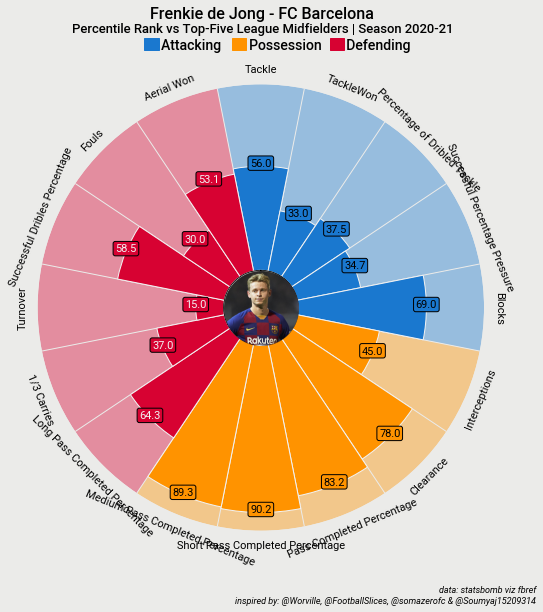

In [153]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 6

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Frenkie de Jong - FC Barcelona", size=16,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs Top-Five League Midfielders | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.14
)   # these values might differ when you are plotting

plt.show()